In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame as df
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
%load_ext jupyternotify


<IPython.core.display.Javascript object>

In [4]:
%time data = pd.read_csv("../../data/raw/fifa.csv",  delimiter=',')

CPU times: user 286 ms, sys: 20.1 ms, total: 306 ms
Wall time: 304 ms


In [16]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="pandas-profiling-reports/fifa.html")


## First approach

In [5]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
data.sample(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
10400,10400,219254,G. Castillejos,32,https://cdn.sofifa.org/players/4/19/219254.png,Argentina,https://cdn.sofifa.org/flags/52.png,65,65,San Martín de San Juan,...,46.0,20.0,24.0,23.0,11.0,12.0,13.0,9.0,12.0,€616K
15737,15737,242652,B. Mines,18,https://cdn.sofifa.org/players/4/19/242652.png,United States,https://cdn.sofifa.org/flags/95.png,59,78,New York Red Bulls,...,47.0,51.0,43.0,42.0,5.0,7.0,12.0,14.0,9.0,€691K
16812,16812,245101,O. Şahin,20,https://cdn.sofifa.org/players/4/19/245101.png,Turkey,https://cdn.sofifa.org/flags/48.png,56,64,BB Erzurumspor,...,48.0,31.0,41.0,47.0,13.0,6.0,10.0,11.0,12.0,€280K
9204,9204,178014,N. Madonna,31,https://cdn.sofifa.org/players/4/19/178014.png,Italy,https://cdn.sofifa.org/flags/27.png,66,66,Padova,...,65.0,65.0,65.0,65.0,5.0,9.0,12.0,10.0,14.0,€659K
8992,8992,240689,J. Sandoval,31,https://cdn.sofifa.org/players/4/19/240689.png,Uruguay,https://cdn.sofifa.org/flags/60.png,66,66,Argentinos Juniors,...,51.0,65.0,66.0,68.0,13.0,8.0,13.0,10.0,9.0,€616K


In [7]:
data.drop(['ID', 'Unnamed: 0'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 87 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [8]:
data.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       

In [9]:
data.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Missing Values

In [10]:
pd.isnull(data).sum()

Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW            

In [11]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 8]

,Total,Missing Percent
Loaned From,16943,93.057615
LDM,2085,11.451639
LM,2085,11.451639
CB,2085,11.451639
LCB,2085,11.451639
LB,2085,11.451639
RWB,2085,11.451639
RDM,2085,11.451639
CDM,2085,11.451639
LWB,2085,11.451639


# Filling players attributes

In [12]:
player_features = ['Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Curve', 'SprintSpeed', 
                   'Reactions', 'ShotPower', 'Stamina', 'Strength', 
                   'Positioning', 'Vision', 'Composure',
                   'StandingTackle', 'SlidingTackle',
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties']

In [13]:
for attr in player_features:
    data[attr].fillna(data[attr].mean(), inplace = True)

In [14]:
pd.isnull(data[player_features]).sum()

Acceleration       0
Aggression         0
Agility            0
Balance            0
BallControl        0
Curve              0
SprintSpeed        0
Reactions          0
ShotPower          0
Stamina            0
Strength           0
Positioning        0
Vision             0
Composure          0
StandingTackle     0
SlidingTackle      0
Crossing           0
Dribbling          0
FKAccuracy         0
Finishing          0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
HeadingAccuracy    0
Interceptions      0
Jumping            0
LongPassing        0
LongShots          0
Marking            0
Penalties          0
dtype: int64

# Filling players physical information

In [15]:
data['Weight'].fillna('200lbs', inplace = True)
data['Weight'] = data['Weight'].str.slice(0,-3,1).astype(float)
data['Weight'] = data['Weight'].apply(lambda x: int(x / 2.2046))
data['Weight']

0        72
1        83
2        68
3        76
4        69
5        73
6        66
7        86
8        82
9        87
10       79
11       76
12       78
13       67
14       72
15       74
16       88
17       73
18       84
19       96
20       76
21       77
22       92
23       69
24       84
25       73
26       71
27       83
28       78
29       58
         ..
18177    73
18178    79
18179    73
18180    78
18181    60
18182    74
18183    86
18184    81
18185    72
18186    78
18187    73
18188    67
18189    74
18190    79
18191    76
18192    74
18193    66
18194    84
18195    63
18196    66
18197    63
18198    69
18199    68
18200    71
18201    76
18202    60
18203    77
18204    67
18205    69
18206    79
Name: Weight, Length: 18207, dtype: int64

In [18]:
data['Height'].fillna("5'11", inplace = True)
data['Height'] = data['Height'].apply(lambda x: round(float(x.replace("\'", ".")) / 3.281, 2))
data['Height']

0        1.74
1        1.89
2        1.80
3        1.95
4        1.56
5        1.77
6        1.77
7        1.83
8        1.83
9        1.89
10       1.83
11       1.83
12       1.89
13       1.77
14       1.71
15       1.55
16       1.89
17       1.80
18       1.89
19       2.01
20       1.89
21       1.86
22       1.95
23       1.77
24       1.89
25       1.55
26       1.80
27       1.86
28       1.56
29       1.65
         ... 
18177    1.55
18178    1.83
18179    1.89
18180    1.86
18181    1.56
18182    1.55
18183    1.89
18184    1.86
18185    1.56
18186    1.55
18187    1.55
18188    1.55
18189    1.55
18190    1.80
18191    1.56
18192    1.86
18193    1.77
18194    1.92
18195    1.77
18196    1.74
18197    1.55
18198    1.56
18199    1.71
18200    1.80
18201    1.86
18202    1.80
18203    1.92
18204    1.77
18205    1.55
18206    1.55
Name: Height, Length: 18207, dtype: float64

In [16]:
data['Body Type'].fillna('Normal', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)

# Filling players public information

In [17]:
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Position'].fillna('Undefined', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['International Reputation'].fillna(1, inplace = True)

# Player Value

In [19]:
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [20]:
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

# Adding categories

In [31]:
def defending(data):
    return int(round(data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()))

def general(data):
    return int(round(data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()))

def mental(data):
    return int(round(data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()))

def passing(data):
    return int(round(data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()))

def mobility(data):
    return int(round(data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()))
def power(data):
    return int(round(data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()))

def rating(data):
    return int(round(data[['Potential', 'Overall']].mean()))

def shooting(data):
    return int(round(data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()))

In [32]:
data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [34]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club Logo', 'Club']]

players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


# Visualization

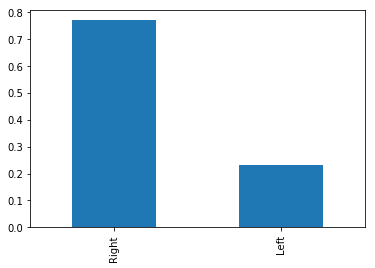

In [21]:
data['Preferred Foot'].value_counts(normalize=True).plot.bar()
plt.show()

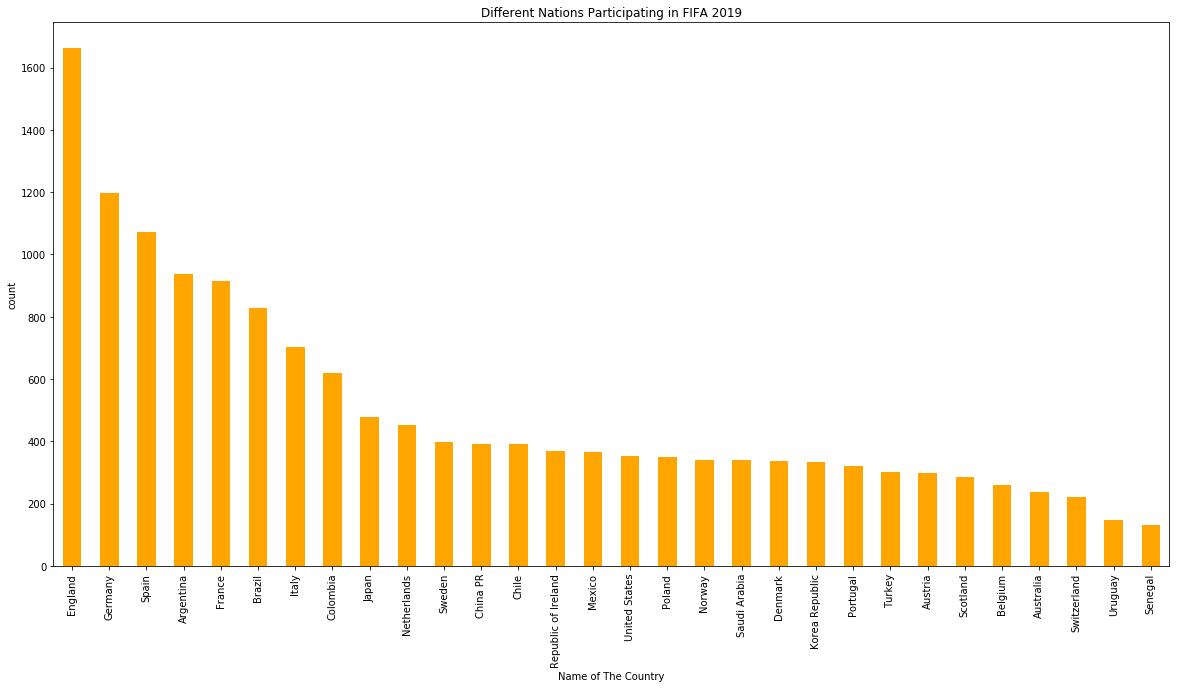

In [22]:
data['Nationality'].value_counts()[:30].plot.bar(color = 'orange', figsize=(20, 10))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

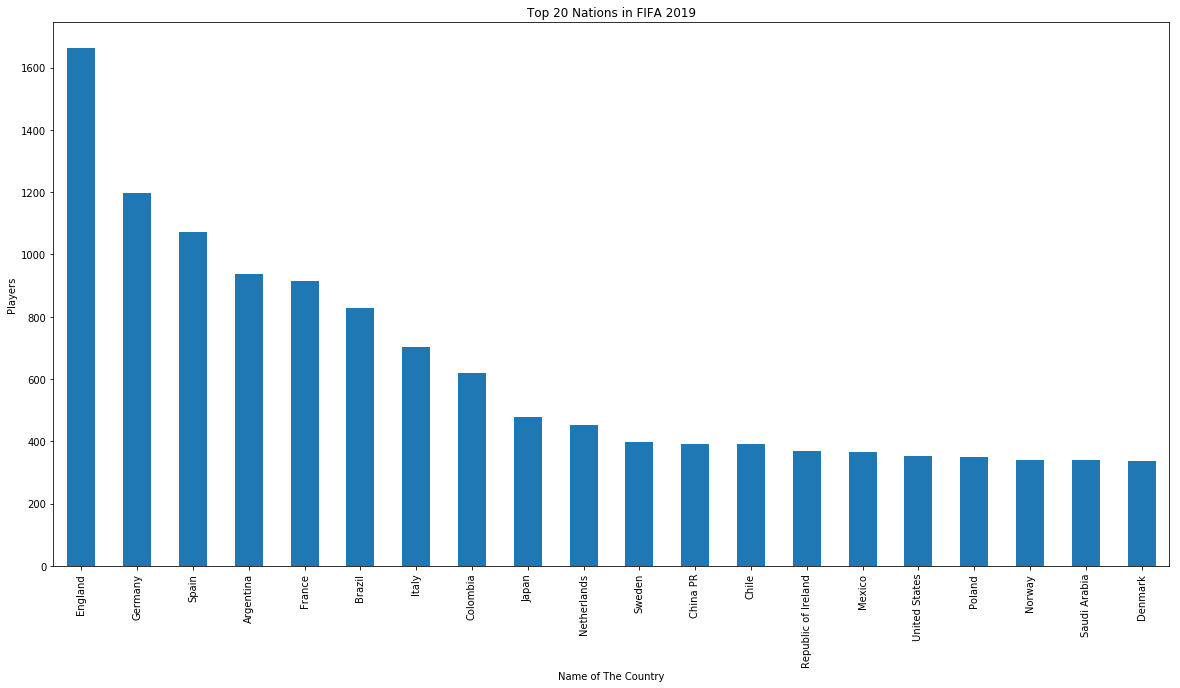

In [23]:
data['Nationality'].value_counts()[:20].plot.bar(figsize=(20, 10))
plt.title('Top 20 Nations in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('Players')
plt.show()

ST           0.118196
GK           0.111221
CB           0.097655
CM           0.076564
LB           0.072609
RB           0.070907
RM           0.061734
LM           0.060142
CAM          0.052617
CDM          0.052068
RCB          0.036360
LCB          0.035591
LCM          0.021695
RCM          0.021475
LW           0.020926
RW           0.020322
RDM          0.013621
LDM          0.013347
LS           0.011369
RS           0.011150
RWB          0.004778
LWB          0.004284
CF           0.004064
Undefined    0.003295
RAM          0.001153
LAM          0.001153
RF           0.000879
LF           0.000824
Name: Position, dtype: float64


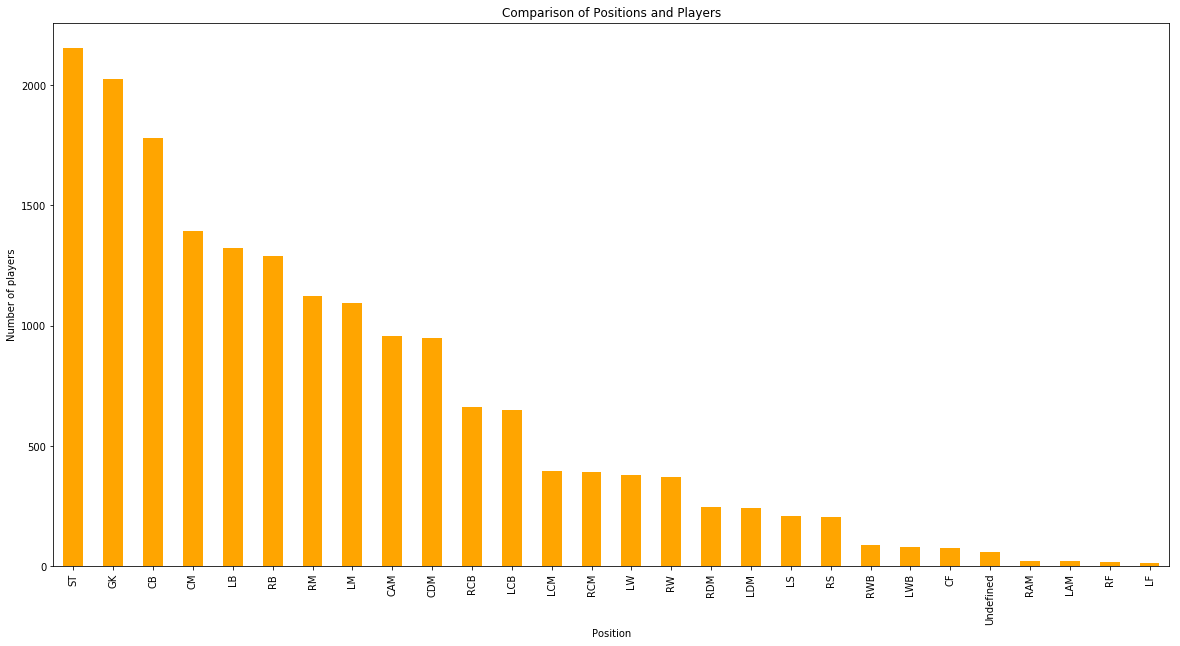

In [24]:
print(data['Position'].value_counts(normalize=True))
data['Position'].value_counts().plot.bar(color = 'orange', figsize=(20, 10))
plt.title('Comparison of Positions and Players')
plt.xlabel('Position')
plt.ylabel('Number of players')
plt.show()

In [25]:

ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique


# Features correlation

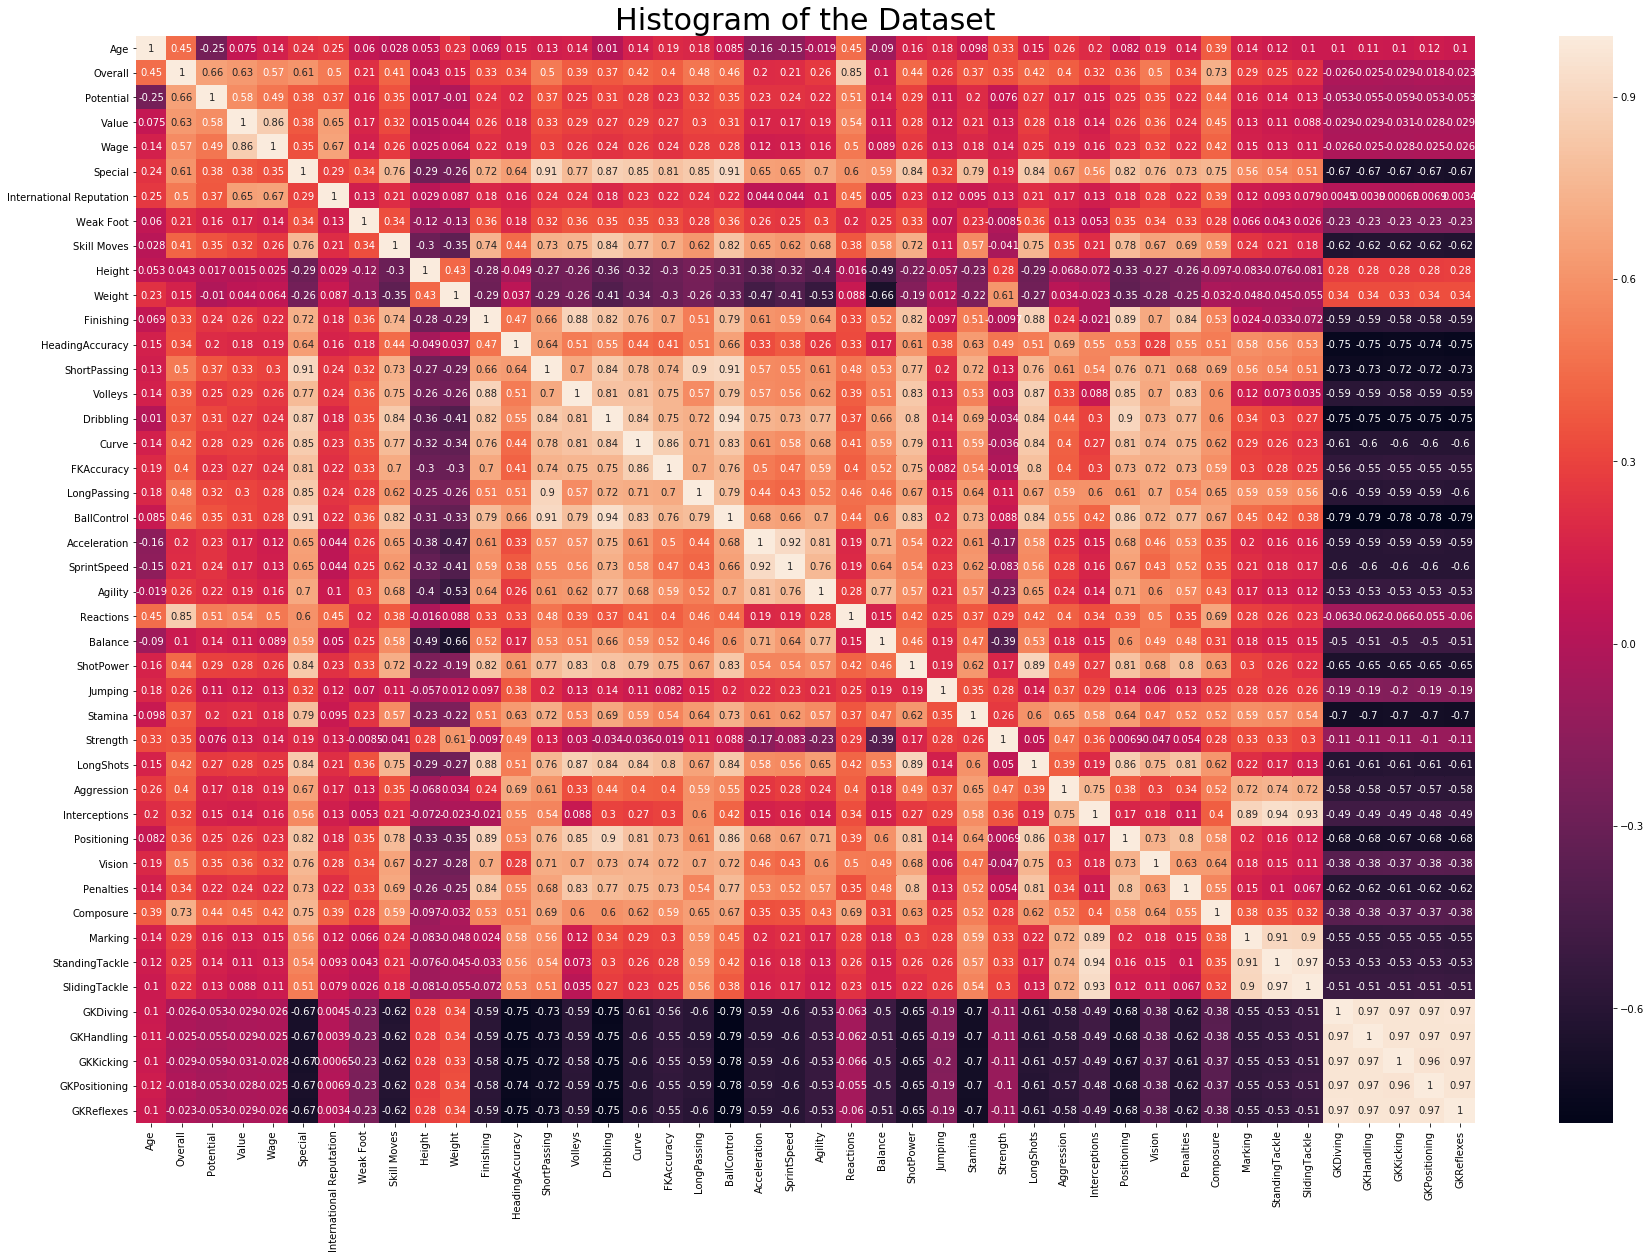

In [26]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Value", "Age", "Overall",
"Potential"]
scatter_matrix(data[attributes], figsize=(16, 8))